# Support Vector Machines

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names # similar function of .columns() in pandas.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names # see decription in cell 2 to get idea of callable features 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Applying some data exploration

In [7]:
df.target.groupby(df['target']).value_counts()

target  target
0       0         50
1       1         50
2       2         50
Name: target, dtype: int64

In [8]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

# here, we create a new column called flower_names.
# the lambda function just assigns the names from the target_names numpy array
# by using the values in the target column as indices of target_names.

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Visualising the data

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [11]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


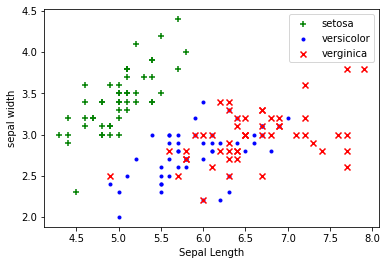

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('sepal width')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red', marker = 'x')


plt.legend(['setosa', 'versicolor', 'verginica'])


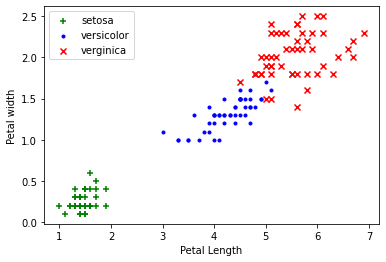

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red', marker = 'x')

plt.legend(['setosa', 'versicolor', 'verginica'])

In [14]:
# Some data cleaning

x = df.drop(['target', 'flower_names'], axis = 1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [16]:
# Model Training

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
len(x_train)

120

In [18]:
len(x_test)

30

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
?SVC.fit
# Run this command to get the docs of the method

In [21]:
model.fit(x_train, y_train) 

SVC()

In [22]:
model.score(x_train, y_train)

0.9833333333333333

In [23]:
model.score(x_test, y_test)

0.9333333333333333

### <strong> We can change the kernel, gamma value, reglularization parameter according to ourselves, and select the one with the best results. </strong>

<div class='alert alert-info'> Video link for followed tutorial: <a href="https://youtu.be/FB5EdxAGxQg"> LINK </a> </div>